# Cauchy-Euler Homogeneus Second Order ODE - Theory

An Cauchy-Euler second order ODE has the following format:
    
$$x^2 \frac{d^2 y}{dx^2} + px \frac{dy}{dx} + qy(x)=0$$

## The Equation's Solution

The general solution $y(x)$ for this type of equation is a linear combination of two fundamental solutions $y_1(x)$ and $y_1(x)$:

$$y(x) = c_1y_1(x) + c_2y_2(x)$$

where $c_1$ and $c_2$ are constants that must be found by solving de initial value problem.

The simplest way of solving Cauchy-Euler second order ODE is assuming the trial solution $y(x)=x^m$. For that, we have $y'(x)=mx^{m-1}$ and $y''(x)=m(m-1)x^{m-2}$, where $m$ is a constant that we must find.

Substituting $y(x)$ and its derivatives in the equation, we have:

$$x^2[m(m-1)x^{m-2}] + px(mx^{m-1}) + qx^m = 0$$

Applying the distributive property, we have:

$$m^2 x^2 x^{m-2} - m x^2 x^{m-2} + px(mx^{m-1}) + qx^m = 0$$

Applying $x^{a-b} = x^a/x^b$, we have:

$$m^2 \frac{x^2 x^m}{x^2} - m \frac{x^2 x^m}{x^2} + pmx \frac{x^m}{x} + qx^m = 0$$

Simplifying:

$$m^2 x^m - m x^m + pm x^m + qx^m = 0$$

Putting $x^m$ in evidence:

$$x^m[m^2 + m(p-1) + q] = 0$$

Assuming that for $x \neq 0$ there is no $m \in \mathbb{C}$ which satisfacts $x^m = 0$, we have:

$$m^2 + m(p-1) + q = 0$$

Applying the quadratic formula, we have $m_1 = \frac{1 -p + \sqrt{\Delta}}{2}$ and $m_2 = \frac{1 -p - \sqrt{\Delta}}{2}$, where $\Delta = (p-1)^2 - 4q$.

### Fundamental and General Solutions

The fundamental solutions  $y_1(x)$  and  $y_2(x)$  need to be linearly independent. This linear independence can be verified by the Wronskian. The characteristc equation can have two real roots, one real root or two complex roots, and there are a pair of fundamentally linearly independent solutions for each of these cases.

#### Case $\Delta > 0$

In this case, $m_1, m_2 \in \mathbb{R}$ and $m_1 \neq m_2$.

The fundamental solutions are $y_1(x)=x^{m_1}$ and, $y_2(x)=x^{m_2}$.

The general solution is:

$$y(x) = c_1 x^{m_1} + c_2 x^{m_2}$$

where $c_1, c_2 \in \mathbb{R}$.

#### Case $\Delta = 0$

In this case, $m = m_1 = m_2$ and $m \in \mathbb{R}$.

The fundamental solutions are $y_1(x)=x^{m}\ln(x)$ and, $y_2(x)=x^{m}$.

The general solution is:

$$y(x) = c_1 x^{m} \ln(x) + c_2 x^{m}$$

where $c_1, c_2 \in \mathbb{R}$.

#### Case $\Delta < 0$

In this case, $m_1, m_2 \in \mathbb{C}$. These roots are $m_1 = \alpha + \beta i$ and $m_2 = \alpha - \beta i$.

The fundamental solutions are $y_1(x)=x^{m_1}$ and, $y_2(x)=x^{m_2}$. Applying $x^{a+b} = x^ax^b$, $e^{\ln x} = x$ and $(x^a)^b = x^{ab}$, we have:

$$y_1(x) = x^{m_1} = x^{\alpha + \beta i} = x^{\alpha}x^{\beta i} = x^{\alpha}(e^{\ln x})^{\beta i} = x^{\alpha} e^{i\beta \ln x }$$ 

and

$$y_2(x) = x^{m_2} = x^{\alpha - \beta i} = x^{\alpha}e^{-i\beta  \ln x}$$

Applying Euler's indentity ($e^{i\theta} = \cos\theta + i\sin\theta$), we have:

$$y_1(x) = x^{\alpha} [\cos(\beta \ln x) + i\sin(\beta \ln x)]$$ 

and 

$$y_2(x) = x^{\alpha}[\cos(\beta  \ln x) - i \sin(\beta  \ln x)]$$

Finally, the general solution is:

$$y(x) = c_1 x^{m_1} + c_2 x^{m_2} = x^\alpha [k_1 \cos(\beta \ln x) + k_2 \sin(\beta \ln x)]$$

where $c_1, c_2, k_1, k_2$ are constants.

# Practice with Python

## Solving the Cauchy-Euler Homogeneus Second-Order ODE
In this practice, we will use the algebraic manipulation of the **SymPy** symbolic math package, numeric features of the **NumPy** package and the plotting from the **MatPlotLib** package. For first, we will import these packages.

In [1]:
from sympy import *
from matplotlib import pyplot as plt
import numpy as np

Now, we gonna define a function to give the roots of the characteristic equation.

In [2]:
def get_characteristic_eq_roots(p, q):
    m = Symbol('m') #Defines the unknown m

    c_eq = Eq(m**2 + m*(p-1) + q, 0) #Gets SymPy's characteristic equation

    c_eq_roots = solve(c_eq, m) #Gets the l roots of the c_eq 
    
    return c_eq_roots

This function returns a list of symbolic roots, that can be two real roots, a single real root or two complex roots. Look that at the following example:

In [3]:
print('Real roots (p=-3, q=2): ', get_characteristic_eq_roots(-3, 2))
print('Complex roots (p=1, q=1): ', get_characteristic_eq_roots(1, 1))
print('Single root (p=3, q=1): ', get_characteristic_eq_roots(3, 1))

Real roots (p=-3, q=2):  [2 - sqrt(2), sqrt(2) + 2]
Complex roots (p=1, q=1):  [-I, I]
Single root (p=3, q=1):  [-1]


Now, we gonna define a function to give the fundamental solutions of the ODE.

In [4]:
def get_ODE_fundamental_solutions(x, p, q):
    c_eq_roots = get_characteristic_eq_roots(p, q)
    
    if len(c_eq_roots) == 1:# Single real root
        m = c_eq_roots[0] #Root lambda
        
        y1 = x**m #fundamental solution y1(x)
        y2 = ln(x)*(x**m) #fundamental solution y2(x)
        
        return [y1, y2]
    
    elif len(c_eq_roots) == 2: #Two roots
        if c_eq_roots[0].is_real == True and c_eq_roots[1].is_real == True: # Real roots
            m1 = c_eq_roots[1] #Root lambda1
            m2 = c_eq_roots[0] #Root lambda2
            
            y1 = x**m1 #fundamental solution y1(x)
            y2 = x**m2 #fundamental solution y2(x)
            
            return [y1, y2]
        
        elif c_eq_roots[0].is_real == False and c_eq_roots[1].is_real == False: # Complex roots
            m1 = c_eq_roots[1] #Root lambda1
            m2 = c_eq_roots[0] #Root lambda2
            
            alpha = re(m1) #Real part of the roots
            beta = abs(im(m1)) #Absolute imaginary part of the roots
            
            y1 = (x**alpha)*( cos(beta*ln(x)) + I*sin(beta*ln(x))) #fundamental solution y1(x)
            y2 = (x**alpha)*( cos(beta*ln(x)) - I*sin(beta*ln(x))) #fundamental solution y2(x)
            
            return [y1, y2]
        
        else: #Error
            raise Exception('Unexpected answer from the get_characteristic_eq_roots function.')
        
    else: #Error
        raise Exception('Unexpected answer from the get_characteristic_eq_roots function.')

This function returns a list of symbolic fundamental solutions. Look that at the following examples:

In [5]:
x = Symbol('x')

print('p=-3, q=2: ', get_ODE_fundamental_solutions(x, -3, 2))
print('p=1, q=1: ', get_ODE_fundamental_solutions(x, 1, 1))
print('p=3, q=1: ', get_ODE_fundamental_solutions(x, 2, 1))

p=-3, q=2:  [x**(sqrt(2) + 2), x**(2 - sqrt(2))]
p=1, q=1:  [I*sin(log(x)) + cos(log(x)), -I*sin(log(x)) + cos(log(x))]
p=3, q=1:  [(I*sin(sqrt(3)*log(x)/2) + cos(sqrt(3)*log(x)/2))/sqrt(x), (-I*sin(sqrt(3)*log(x)/2) + cos(sqrt(3)*log(x)/2))/sqrt(x)]


Now, we gonna define a function to give the symbolic general solution.

In [6]:
def get_ODE_solution(x, p, q, c1, c2):
    fundamental_solutions = get_ODE_fundamental_solutions(x, p, q)
    
    y1 = fundamental_solutions[0] #Fundamental solution y1(x)
    y2 = fundamental_solutions[1] #Fundamental solution y2(x)
    
    y = c1*y1 + c2*y2 #General solution y(x)
    
    return y

Testing...

In [7]:
x, c1, c2 = Symbol('x'), Symbol('c1'), Symbol('c2')

print('p=-3, q=2: ', get_ODE_solution(x, -3, 2, c1, c2))
print('p=1, q=1: ', get_ODE_solution(x, 1, 1, c1, c2))
print('p=2, q=1: ', get_ODE_solution(x, 2, 1, c1, c2))

p=-3, q=2:  c1*x**(sqrt(2) + 2) + c2*x**(2 - sqrt(2))
p=1, q=1:  c1*(I*sin(log(x)) + cos(log(x))) + c2*(-I*sin(log(x)) + cos(log(x)))
p=2, q=1:  c1*(I*sin(sqrt(3)*log(x)/2) + cos(sqrt(3)*log(x)/2))/sqrt(x) + c2*(-I*sin(sqrt(3)*log(x)/2) + cos(sqrt(3)*log(x)/2))/sqrt(x)


Finally, we will define a function to give the $y(x)$ values for any $x$ input in the ODE solution.

In [8]:
def get_ODE_function(p, q, c1, c2):
    x = Symbol('x')
    
    symbolic_solution = get_ODE_solution(x, p, q, c1, c2)
    
    y_function = lambdify(x, symbolic_solution)
    
    return y_function

## Plotting $y(x)$
Plotting $y(x)$ from $y''(x) - 3y'(x) + 2y(x) = 0$ with $c_1 = c_2 = 1$: 

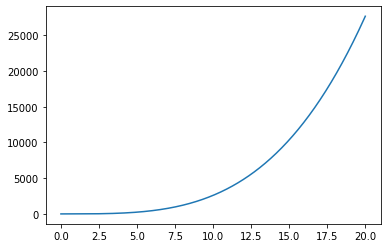

In [9]:
p, q, c1, c2 = (-3, 2, 1, 1)
y = get_ODE_function(p, q, c1, c2) #y(x) function
x = np.linspace(0,20,500) #500 dots in [0, 20]
plt.plot(x,y(x).real) #Plot the real part of y(x)
plt.show()

Plotting $y(x)$ from $y''(x) + 2y'(x) + 20y(x) = 0$ with $c_1 = c_2 = 1$: 

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: invalid value encountered in sin
<string>:2: RuntimeWarning: invalid value encountered in cos


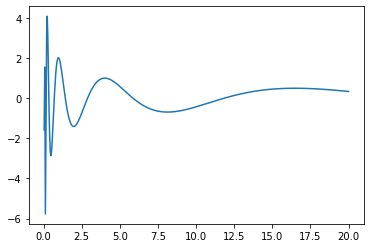

In [10]:
p, q, c1, c2 = (2, 20, 1, 1)
y = get_ODE_function(p, q, c1, c2) #y(x) function
x = np.linspace(0,20,500) #500 dots in [0, 20]
plt.plot(x,y(x).real) #Plot the real part of y(x)
plt.show()

Plotting $y(x)$ from $y''(x) + y'(x) + 10y(x) = 0$ with $c_1 = c_2 = 1$: 

<string>:2: RuntimeWarning: divide by zero encountered in log
<string>:2: RuntimeWarning: invalid value encountered in cos


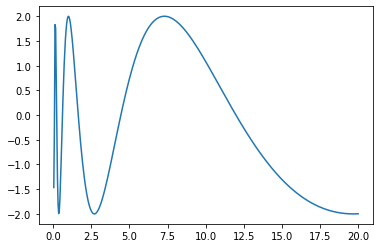

In [11]:
p, q, c1, c2 = (1, 10, 1, 1)
y = get_ODE_function(p, q, c1, c2) #y(x) function
x = np.linspace(0,20,500) #500 dots in [0, 20]
plt.plot(x,y(x).real) #Plot the real part of y(x)
plt.show()